In [10]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# 2. Load Data using yfinance
ticker = "AAPL"
df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
df = df[['Close']]
df.head()


/tmp/ipython-input-11-1129629611.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288584
2015-01-05,23.604326
2015-01-06,23.606558
2015-01-07,23.937571
2015-01-08,24.857302


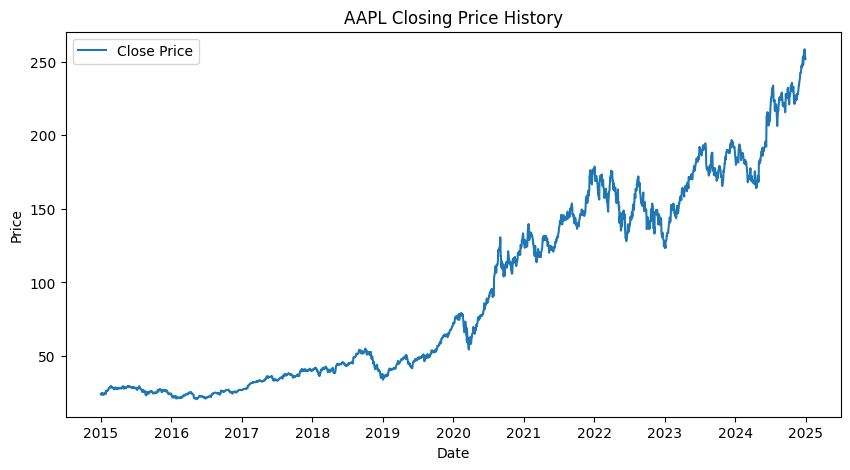

In [12]:
# 3. Visualize Closing Price
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.title(f"{ticker} Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [13]:
# 4. Preprocess Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences of 60 days
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)
print("Input shape:", X.shape)

Input shape: (2455, 60, 1)


In [14]:
# 5. Train-Test Split (80-20)
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [15]:
# 6. Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 7. Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0167 - val_loss: 0.0013
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0011 - val_loss: 9.7118e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.0582e-04 - val_loss: 0.0047
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 9.8604e-04 - val_loss: 0.0015
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 8.0918e-04 - val_loss: 9.3440e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 9.5125e-04 - val_loss: 0.0038
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 8.3318e-04 - val_loss: 0.0028
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.2552e-04 - val_loss: 0.0021
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 7.7098e-04 - val_loss: 7.1800e-04
Epoch 12/20
62/62 ━━━━━

In [17]:
# 8. Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


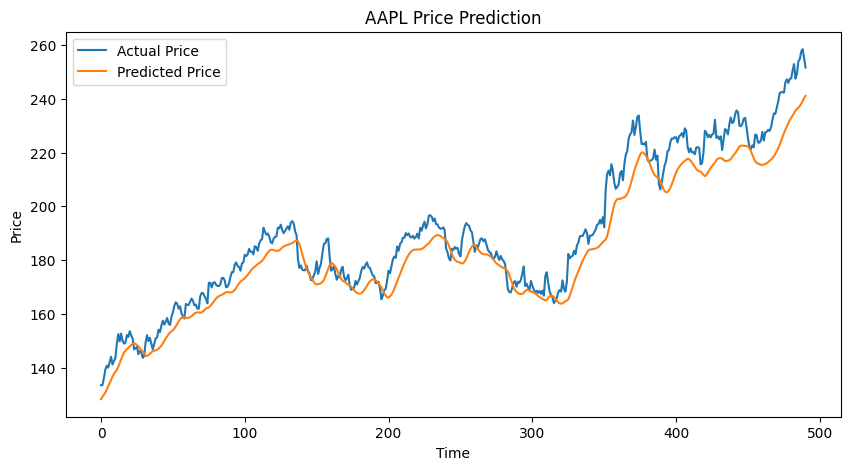

In [18]:
# 9. Visualize Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f"{ticker} Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [24]:
# 10. Save Model
model.save("stock_lstm.h5")

In [25]:
from google.colab import files
files.download("stock_lstm.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>